In [1]:
using Pkg
# Pkg.activate("C:\\Research\\Encoder_Modeling\\Encoder_Analysis")

using Random
using StateSpaceDynamics
using Distributions
using Plots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra
using MultivariateStats
using Glob
using Dates
include(".\\Zutils.jl")

# using StatsPlots

# For testing and debugging
Random.seed!(1234);

const SSD = StateSpaceDynamics

base_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\"
session_folders = filter(isdir, glob("*", base_path))

6-element Vector{String}:
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R1"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_3d"
 "C:\\Research\\Encoder_Modeling\\En" ⋯ 17 bytes ⋯ "ocessed_Encoder\\R14_529_4thlick"
 "C:\\Research\\Encoder_Modeling\\En" ⋯ 18 bytes ⋯ "cessed_Encoder\\R14_Not_Filtered"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_ToInclude"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R16"

In [13]:
session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_529_4thlick\\TD1d_2023_02_21_P2\\";
# session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_ToInclude\\TD1d_2023_02_21_P2\\";
prb=1;

if prb == 1
    println("Probe 1 Processing -> Check this!")
    Probe1_R1, Probe2_R1, PCA_P1_R1, PCA_P2_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe1_R4, Probe2_R4, PCA_P1_R4, PCA_P2_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe1_R1_Cut, Probe2_R1_Cut, PCA_P1_R1_Cut, PCA_P2_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe1_R4_Cut, Probe2_R4_Cut, PCA_P1_R4_Cut, PCA_P2_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
else
    println("Probe 2 Processing -> Check this!")
    Probe11_R1, Probe1_R1, PCA_P11_R1, PCA_P1_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe11_R4, Probe1_R4, PCA_P11_R4, PCA_P1_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe11_R1_Cut, Probe1_R1_Cut, PCA_P11_R1_Cut, PCA_P1_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe11_R4_Cut, Probe1_R4_Cut, PCA_P11_R4_Cut, PCA_P1_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
end

Probe 1 Processing -> Check this!


([[-0.45723 -0.49692 … -0.47238 -0.38221; -0.45723 -0.49692 … -0.47238 -0.38221; … ; -0.45723 42.362 … -0.47238 6.3444; -0.45723 73.84 … -0.47238 1.575], [42.402 -0.49692 … -0.47238 -0.38221; 31.02 -0.49692 … -0.47238 -0.38221; … ; -0.45723 -0.49692 … -0.47238 -0.38221; -0.45723 -0.49692 … -0.47238 -0.38221], [-0.45723 -0.49692 … -0.47238 -0.38221; -0.45723 -0.49692 … -0.47238 -0.38221; … ; -0.45723 75.797 … -0.47238 -0.38221; -0.45723 47.96 … -0.47238 -0.38221], [1.4999 42.362 … -0.47238 -0.38221; -0.45723 30.981 … -0.47238 -0.38221; … ; 31.02 -0.49692 … -0.47238 -0.38221; 16.522 -0.49692 … -0.47238 -0.38221], [1.4999 16.482 … -0.47238 -0.38221; -0.45723 6.2297 … -0.47238 -0.38221; … ; -0.45723 49.089 … -0.47238 -0.38221; -0.45723 75.797 … -0.47238 -0.38221], [31.02 30.981 … -0.47238 -0.38221; 16.522 16.482 … -0.47238 -0.38221; … ; -0.45723 -0.49692 … -0.47238 -0.38221; -0.45723 -0.49692 … -0.47238 -0.38221], [16.522 -0.49692 … -0.47238 -0.38221; 6.2694 -0.49692 … -0.47238 -0.38221; …

In [3]:
Tongue_mat_R1 = Tongue_mat_R1[50:end, :]
Tongue_mat_R4 = Tongue_mat_R4[50:end, :]

551×50 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      16.214  NaN  NaN  NaN  NaN  NaN
   ⋮                        ⋮            ⋱             ⋮                 
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN      Na

In [53]:
"""
Cut the kinematics up (in the case of the TD3d shift)
"""

KP_R1 = [el[51:end, :] for el in KP_R1];
KP_R4 = [el[51:end, :] for el in KP_R4];
KP_R1_Cut = [el[51:end, :] for el in KP_R1_Cut];
KP_R4_Cut = [el[51:end, :] for el in KP_R4_Cut];


"""
Cut from the end of neural data to conserve sizes
"""
PCA_P1_R1 = [el[1:end-50, :] for el in PCA_P1_R1];
PCA_P1_R4 = [el[1:end-50, :] for el in PCA_P1_R4];
PCA_P1_R1_Cut = [el[1:end-50, :] for el in PCA_P1_R1_Cut];
PCA_P1_R4_Cut = [el[1:end-50, :] for el in PCA_P1_R4_Cut];



In [34]:
size(PCA_P1_R1_Cut[1])

(220, 10)

In [49]:
LRCs_R1[34]

141

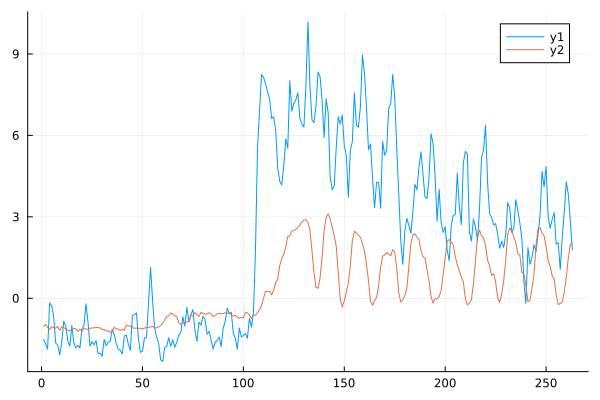

In [15]:
trial = 1
plot(PCA_P1_R1_Cut[trial][:,1])
plot!(KP_R1_Cut[trial][:,10])

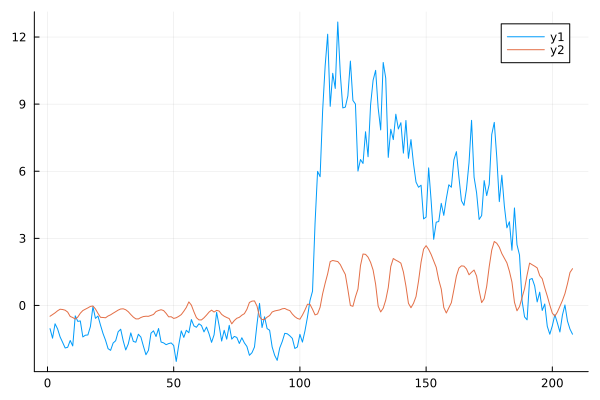

In [10]:
trial = 50
plot(PCA_P1_R1_Cut[trial][:,1])
plot!(KP_R1_Cut[trial][:,10])

In [4]:
"""
Remove NaN values
"""


# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1)
    # Replace NaN values in each matrix with 0
    KP_R1[i] .= replace(KP_R1[i], NaN => 0.0)
end

for i in 1:length(KP_R4)
    # Replace NaN values in each matrix with 0
    KP_R4[i] .= replace(KP_R4[i], NaN => 0.0)
end

# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1_Cut)
    # Replace NaN values in each matrix with 0
    KP_R1_Cut[i] .= replace(KP_R1_Cut[i], NaN => 0.0)
end

for i in 1:length(KP_R4_Cut)
    # Replace NaN values in each matrix with 0
    KP_R4_Cut[i] .= replace(KP_R4_Cut[i], NaN => 0.0)
end

In [21]:
"""
Omit certain kinematic features if necessary
"""

# 1:17, 20:24

KP_R4 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4]
KP_R1 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1]
KP_R4_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4_Cut]
KP_R1_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1_Cut]


152-element Vector{Matrix{Float64}}:
 [-0.022845 -0.068814 … 0.05735 0.17095; -0.022845 -0.068814 … 0.05735 -0.017066; … ; -1.9129 -1.2425 … -0.97499 0.20901; -2.0959 -1.7367 … -1.2097 0.023197]
 [-0.022845 -0.068814 … 0.05735 -0.68955; -0.022845 -0.068814 … 0.05735 -0.73687; … ; -2.7992 -3.148 … 0.73432 1.5226; -2.6558 -2.6948 … -0.19749 1.1529]
 [-0.022845 -0.068814 … 0.05735 0.19036; -0.022845 -0.068814 … 0.05735 0.46269; … ; -2.3993 -1.9967 … -1.6489 -0.68386; -2.7763 -2.6921 … -1.3813 -0.26651]
 [-0.022845 -0.068814 … 0.05735 0.345; -0.022845 -0.068814 … 0.05735 0.45877; … ; -1.9453 -2.2606 … -0.59763 0.68586; -1.3335 -1.3195 … -0.93077 0.45902]
 [-0.022845 -0.068814 … 0.05735 0.18035; -0.022845 -0.068814 … 0.05735 -0.05337; … ; -1.2186 -1.1631 … -1.0916 0.024948; -0.17639 1.1435 … -1.2002 0.033918]
 [-0.022845 -0.068814 … 0.05735 0.0026556; -0.022845 -0.068814 … 0.05735 0.093787; … ; 1.2217 1.7325 … -0.20741 0.98622; 1.1774 1.2058 … -0.45794 0.67205]
 [-0.022845 -0.068814 … 0.057

In [5]:
"""
Prefit the encoder models
"""

println("Prefitting Encoders")
lags=4
leads = 0
start_time = 90
dif = 100-lags;

# Get enough data to create kernel and start at GC still
# X_R1 = [X[100-lags:end,:] for X in Jaw_R1]
# X_R4 = [X[100-lags:end,:] for X in Jaw_R4]

X_R1 = [X[start_time-lags+1:end,:] for X in KP_R1]
X_R4 = [X[start_time-lags+1:end,:] for X in KP_R4]


Y_R1 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)


# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

FCs_R4 = FCs_R4 .- start_time
FCs_R1 = FCs_R1 .- start_time

LRCs_R4 = LRCs_R4 .- start_time
LRCs_R1 = LRCs_R1 .- start_time

FCs = cat(FCs_R1, FCs_R4, dims=2)
LRCs= cat(LRCs_R1, LRCs_R4, dims=1)

X_R1 = [X_R1_kernel[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(X_R1_kernel)]
X_R4 = [X_R4_kernel[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(X_R4_kernel)]

Y_R1 = [Y_R1_trimmed[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(Y_R1_trimmed)]
Y_R4 = [Y_R4_trimmed[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(Y_R4_trimmed)]

X_eng = cat(X_R1, X_R4, dims=1)
Y_eng = cat(Y_R1, Y_R4, dims=1)

# X_eng = X_R1;
# Y_eng = Y_R1;


# X_R1 = [X_R1_kernel[i][LRCs_R1[i]-7:(LRCs_R1[i]), :] for i in eachindex(X_R1_kernel)]
# X_R4 = [X_R4_kernel[i][LRCs_R4[i]-7:(LRCs_R4[i]), :]  for i in eachindex(X_R4_kernel)]

# Y_R1 = [Y_R1_trimmed[i][LRCs_R1[i]-7:(LRCs_R1[i]), :]  for i in eachindex(Y_R1_trimmed)]
# Y_R4 = [Y_R4_trimmed[i][LRCs_R4[i]-7:(LRCs_R4[i]), :]  for i in eachindex(Y_R4_trimmed)]


# X_diseng = cat(X_R1, X_R4, dims=1)
# Y_diseng = cat(Y_R1, Y_R4, dims=1)

# Prefit engaged model
X_eng = vcat(X_eng...)
Y_eng = vcat(Y_eng...)

β_eng, Σ_eng = weighted_ridge_regression(X_eng, Y_eng, 0.01)

# # seems to be a problem with X
# X_diseng = vcat(X_diseng...)
# Y_diseng = vcat(Y_diseng...)

# β_diseng, Σ_diseng = weighted_ridge_regression(X_diseng, Y_diseng, 0.01)

Prefitting Encoders


([4.810737175052928 -1.6157609465539235 … 0.09261434511945053 0.4366798856924792; 0.041218749567670285 0.006635239087447909 … 0.04987640598004761 0.029845013225272592; … ; 0.16137826924812665 0.02316346179288268 … 0.24329889518630649 -0.15971935421961286; -0.18568952713557232 0.08346120822836936 … -0.10230155107657203 0.07653049113025259], [3.0772687581908085 0.14749720429875796 … -0.05375035502219349 -0.34479607317500144; 0.14749720429875796 1.1627469115537499 … -0.03712510576710525 0.11704810601869568; … ; -0.05375035502219349 -0.03712510576710525 … 1.9155406939337327 -0.1714289920663198; -0.34479607317500144 0.11704810601869568 … -0.1714289920663198 1.187742719853067])

In [26]:
size(X[30])

(0, 26)

In [21]:
for i in 1:length(X)
    if size(X[i])[1]==0
        println("yikes")
        println(i)
    end
end


yikes
30


In [6]:
"""
Set up the switching encoder model
"""

println("Setting up switching model")

X_R1 = [X[start_time-lags:end,:] for X in KP_R1_Cut]
X_R4 = [X[start_time-lags:end,:] for X in KP_R4_Cut]
# X = cat(X_R1, X_R4, dims=1)

X = X_R1;
# deleteat!(X, 30)
# Y = cat(PCA_P1_R1_Cut, PCA_P1_R4_Cut, dims=1)
Y = PCA_P1_R1_Cut;

Y = [y[start_time-lags:end, :] for y in Y]
# deleteat!(Y, 30)

# X_ready = permutedims.(X_ready)
# Y_ready = permutedims.(Y_ready)

# X_ready = rand(size(X_ready)...)

X_kern = kernelize_window_features(X)
Y_trim = kernelize_window_features(Y)

# Y_trim = trim_Y_train_past(Y)

X_ready = permutedims.(X_kern)
Y_ready = permutedims.(Y_trim)
# Y_ready = [randn(size(y)) for y in Y_ready]


# Initialize the Gaussian HMM-GLM
model = SwitchingGaussianRegression(;K=2, input_dim=size(X_ready[1])[1], output_dim=size(Y_ready[1])[1], include_intercept=true)

# model.B[1].β = β_eng
# model.B[1].Σ = Σ_eng


# model.B[2].β = β_diseng
# model.B[2].Σ = Σ_eng

model.A = [0.9999 0.0001; 0.0001 0.9999]
model.πₖ = [0.0001; 0.9999]

lls = fit_custom!(model, Y_ready, X_ready, max_iters=100)

plot(lls)
title!("Training Log-Likelihood")
xlabel!("EM Iteration")
ylabel!("Log-Likelihood")

Setting up switching model


ArgumentError: ArgumentError: invalid Array dimensions

Calculating average inference


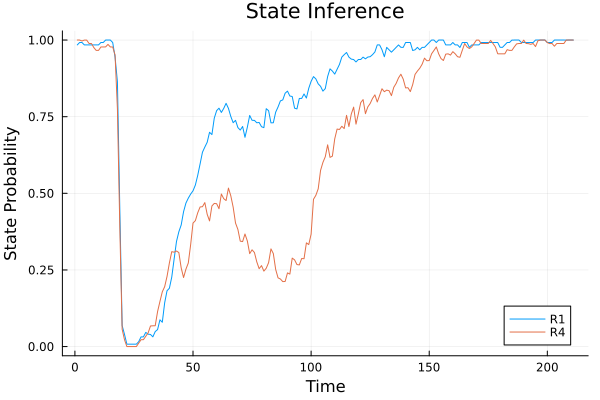

In [7]:
"""
Plot the trial averaged inference
"""

println("Calculating average inference")
X_R1 = [X[start_time-lags:300,:] for X in KP_R1]
X_R4 = [X[start_time-lags:300,:] for X in KP_R4]

Y_R1 = [Y[start_time-lags:300,:] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags:300, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)

# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

YY = permutedims.(Y_R1_trimmed)
XX = permutedims.(X_R1_kernel)

YY_R4 = permutedims.(Y_R4_trimmed)
XX_R4 = permutedims.(X_R4_kernel)


FB_R1 = label_data(model, YY, XX);
FB_R4 = label_data(model, YY_R4, XX_R4);

V1 = SSD.viterbi(model, YY, XX);
V4 = SSD.viterbi(model, YY_R4, XX_R4);

# Extract γ[1, :] for each K in OO
γ_vectors_R1 = [FB_R1[K].γ[1, :] for K in eachindex(FB_R1)]
γ_mean_R1 = mean(exp.(hcat(γ_vectors_R1...)), dims=2)

γ_vectors_R4 = [FB_R4[K].γ[1, :] for K in eachindex(FB_R4)]
γ_mean_R4 = mean(exp.(hcat(γ_vectors_R4...)), dims=2)

plot(γ_mean_R1; label="R1")
plot!(γ_mean_R4; label="R4")
title!("State Inference")
ylabel!("State Probability")
xlabel!("Time")

In [8]:
"""
Look at single trial PC predictions
"""

Tongue_R1 = Tongue_mat_R1[start_time:300, :];
Tongue_R4 = Tongue_mat_R4[start_time:300, :];

# Save the data to export to MATLAB figure making
R4_Tongue = permutedims(hcat(Tongue_R4...))
R1_Tongue = permutedims(hcat(Tongue_R1...))
R4_States = permutedims(hcat(γ_vectors_R4...))
R1_States = permutedims(hcat(γ_vectors_R1...))

R4_Vit = permutedims(hcat(V4...))
R1_Vit = permutedims(hcat(V1...))

# Convert matrices to DataFrames, using :auto for column names (if you don't want specific column names)
Tongue_R4 = Tongue_R4[1:201, :];
Tongue_R1 = Tongue_R1[1:201, :];

R4_Tongue_df = DataFrame(permutedims(Tongue_R4), :auto)
R1_Tongue_df = DataFrame(permutedims(Tongue_R1), :auto)


# Get predictions at each time point from the correct emission model based on the state
trial = 1;

X_trial = X_R4_kernel[trial];
Y_trial = Y_R4_trimmed[trial];
T, D = size(X_trial)
_, O = size(Y_trial)  # O = output dimension

# Initialize prediction matrix
y_pred = zeros(T, O)

for i in 1:size(X_trial,1)
# Find the state
state = exp(R4_States[trial,i])

N, D = size(X_trial)
X_bias = hcat(ones(N), X_trial)  # Add intercept column
#    X_bias = X_trial

if state == 1.0
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[1].β)
else
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[2].β)
end
end

PC = 1
r2_score(Y_trial[:,PC], y_pred[:,PC])

0.4029586197996119

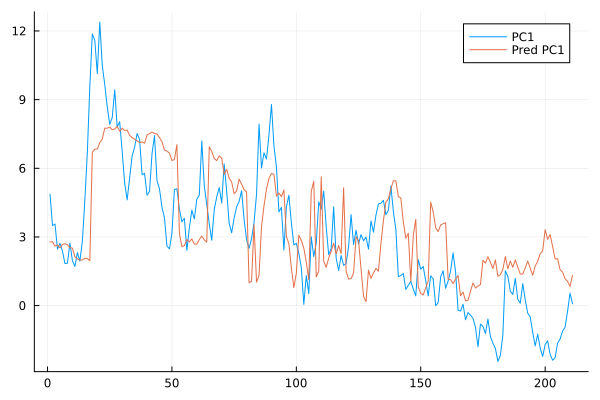

In [9]:
plot(Y_trial[:,PC], label="PC1")
plot!(y_pred[:,PC], label="Pred PC1")

In [10]:
"""
Calculate average PC prediction accuracy
"""

num_trials = length(X_R4_kernel)
_, O = size(Y_R4_trimmed[1])  # O = number of PCs (output dims)

# Initialize matrix to store R² scores (trials × PCs)
r2_scores = zeros(num_trials, O)

for trial in 1:num_trials
    X_trial = X_R4_kernel[trial]
    Y_trial = Y_R4_trimmed[trial]
    T, D = size(X_trial)

    # Initialize prediction matrix
    y_pred = zeros(T, O)

    # Add bias term (intercept)
    X_bias = hcat(ones(T), X_trial)

    for i in 1:T
        # Find the state (use exp because you stored log probs?)
        state = exp(R4_States[trial, i])

        if state == 1.0
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[1].β
        else
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[2].β
        end
    end

    # Now compute R² for each PC
    for pc in 1:O
        r2_scores[trial, pc] = r2_score(Y_trial[:, pc], y_pred[:, pc])
    end
end

mean_r2_per_pc = mean(r2_scores, dims=1)  # 1 × 12 matrix
mean_r2_per_pc = vec(mean_r2_per_pc)      # convert to 12-element Vector

50-element Vector{Float64}:
  0.533993211333737
  0.27925202144307276
  0.3905941112706163
 -0.24870935390970544
  0.1617569868476135
 -0.5251438030820514
 -0.17684177995086298
 -0.1591806345479963
 -0.1442070349699816
 -0.23673948732181288
  ⋮
  0.28188653447900797
  0.3840182182162835
 -0.25298375799443634
  0.1712230623717673
 -0.521567357252725
 -0.16524500045475551
 -0.16498981437797008
 -0.13827505580915958
 -0.23722670864520803

In [57]:
"""
Visualization of I/O + State Inference
"""

trial = 1
x = 1:length(R1_States[trial, :])

X_R1_trimmed = trim_Y_train_past(X_R1, lags)


plot(
    plot(x, exp.(R1_States[trial, :]), label="State Inference", ylabel="State", legend=:topright, title="Single Trial Inference and Features"),
    plot(x, Tongue_R1[:, trial], label="Tongue", ylabel="Tongue", legend=:topright),
    plot(x, X_R1_trimmed[trial][:,1], label="KP") |> p -> plot!(p, x, X_R1_trimmed[trial][:,2], label="KP", ylabel="KP"),
    plot(x, Y_R1_trimmed[trial][:,:], label=false),
    layout = @layout([a; b; c; d]),
    link = :x,
    size=(800,600),
)

In [22]:
size(R4_States)

(109, 211)

In [11]:

"""
VITERBI STATES SAVED
"""
session = splitpath(session_path)[end]
session_save = replace(session, "-" => "_")

if !isdir(joinpath("Results_Window\\" *session_save))
    mkpath(joinpath("Results_Window\\" *session_save))
end

println("SAVE PATH", (joinpath("Results_Window\\" *session_save, "R14_PC_R2_Reg.csv")))

R4_States_Vit_df = DataFrame(R4_Vit, :auto)
R1_States_Vit_df = DataFrame(R1_Vit, :auto)
R4_States_df = DataFrame(R4_States, :auto)
R1_States_df = DataFrame(R1_States, :auto)

println("HEREHRHEHR")

# Wrap vector into a DataFrame
# Convert to DataFrame
mean_r2_df = DataFrame(mean_r2_per_pc', :auto)  # make it a 1×12 DataFrame

println("HERE")
println(session_save)
# Save
CSV.write(joinpath("Results_Window\\" *session_save, "R14_PC_R2_Reg.csv"), mean_r2_df; header=false)
println("EHRHEHEHE")
CSV.write(joinpath("Results_Window\\" *session_save, "R14_Tongue_Reg.csv"), R4_Tongue_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_Tongue_Reg.csv"), R1_Tongue_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R14_States_Reg.csv"), R4_States_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_States_Reg.csv"), R1_States_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R14_States_Vit_Reg.csv"), R4_States_Vit_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_States_Vit_Reg.csv"), R1_States_Vit_df; header=false)

println("SESSION DATA SAVED")

SAVE PATHResults_Window\TD3d_2023_04_15_P1\R14_PC_R2_Reg.csv
HEREHRHEHR
HERE
TD3d_2023_04_15_P1
EHRHEHEHE
SESSION DATA SAVED
